# 決定木 

ノンパラメトリック。正規化や標準化が必要ない。決定木単体は精度はそんなによくない。過学習しやすい。

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.9000,3.0000,4.2000,1.5000,1
1,5.8000,2.6000,4.0000,1.2000,1
2,6.8000,3.0000,5.5000,2.1000,2
3,4.7000,3.2000,1.3000,0.2000,0
4,6.9000,3.1000,5.1000,2.3000,2


In [3]:
X_train = train.iloc[:,0:4]
y_train = train.iloc[:,4]
X_test = test.iloc[:,0:4]
y_test = test.iloc[:,4]

## 決定木の学習 

Best parameters : {'max_depth': 3}
Best cross-validation score : 0.964
score : 97.37%


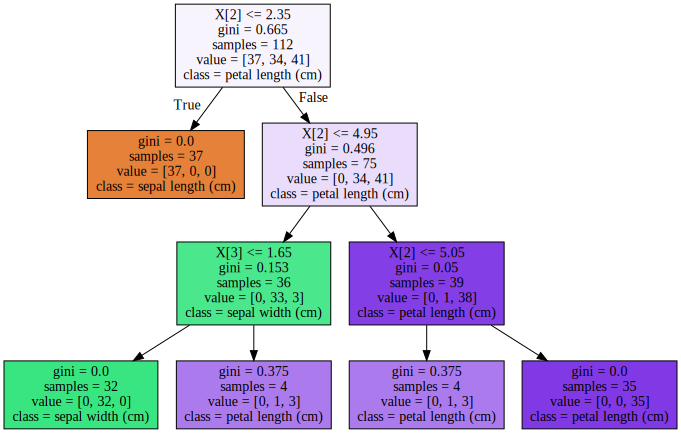

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn import tree

params = {'max_depth' : range(1,10)}


grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = params,
    cv = 5
)
grid.fit(X_train, y_train)

print("Best parameters : {}".format(grid.best_params_))
print("Best cross-validation score : {:.3f}".format(grid.best_score_))
print("score : {:.2f}%".format(grid.score(X_test, y_test)*100))

graph = graphviz.Source(tree.export_graphviz(grid.best_estimator_, class_names=train.columns, filled=True))
graph

## 決定境界(Decision Boundaly)

/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have t

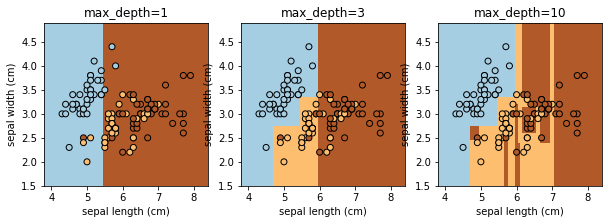

In [31]:
from script import decision_boundary
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# モジュールの再読み込み
# import importlib
# importlib.reload(decision_boundary)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, d in zip(axes, [1, 3, 10]):
    title = "max_depth=%s"% (d)
    clf = DecisionTreeClassifier(max_depth=d)
    decision_boundary.decision_boundary(clf, X_train.iloc[:,0:2].values, y_train, ax,train.columns[0],train.columns[1],title)
